In [27]:
import pyvsc
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
#plt.style.use('ieee.mplstyle')
color_cycle =['#fc4f30', '#5cb85c', '#30a2da',  '#e5ae38',  '#8b8b8b'] 
k2deg = 273.15
T_a = 40+k2deg

In [25]:
k2deg = 273.15

man_electric = {
        'i_1':1400 ,'m_1':0.8 , 'cosphi_1':0.8,'p_igbt_1':3570 ,'p_diode_1':1046 ,
        'i_2':1000 ,'m_2':0.8 , 'cosphi_2':0.2,'p_igbt_2':1952 ,'p_diode_2': 931 ,
        'i_3':1300 ,'m_3':0.8 , 'cosphi_3':0.2,'p_igbt_3':2772 ,'p_diode_3':1252 ,
        'i_4':1000 ,'m_4':0.1 , 'cosphi_4':0.2,'p_igbt_4':1882 ,'p_diode_4': 987 ,
        'i_5':1500 ,'m_5':0.85, 'cosphi_5':0.5,'p_igbt_5':3749 ,'p_diode_5':1293 ,
        }    

man_thermal = {
        'p_igbt':3570 ,'p_diode':1046 , 'T_igbt':125+k2deg , 'T_diode':97+k2deg , 'T_sink':57.3+k2deg, 'T_a':40.0+k2deg}


params = pyvsc.man2param(man_electric,man_thermal)

I = np.arange(100,1600,100)
sim_e,sim_th = pyvsc.vscthmodel(I, 0.8, 1.0, 25.0+273.15, params)

[[ 1.0000e+00  1.4000e+03 -8.9600e+02  1.9600e+06 -1.2544e+06]
 [ 1.0000e+00  1.0000e+03 -1.6000e+02  1.0000e+06 -1.6000e+05]
 [ 1.0000e+00  1.3000e+03 -2.0800e+02  1.6900e+06 -2.7040e+05]
 [ 1.0000e+00  1.0000e+03 -2.0000e+01  1.0000e+06 -2.0000e+04]
 [ 1.0000e+00  1.5000e+03 -6.3750e+02  2.2500e+06 -9.5625e+05]]


### Steps

1. Obtain 5 points from manufacturer simulations or experiments considering at least to power factor values
2. Use formulation to obtain $P_{igbt}$ and $P_{diode}$ polynomios
3. With nominal current obtain $R_{th}^{igbt}$, $R_{th}^{diode}$ and $R_{th}^{sink}$

$$R_{th}^{igbt} = \frac{T_{igbt}-T_{sink}}{P_{igbt}}$$

$$R_{th}^{diode} = \frac{T_{diode}-T_{sink}}{P_{diode}}$$

$$R_{th}^{sink} = \frac{T_{sink}-T_{a}}{P_{igbt}+P_{diode}}$$


### Validation


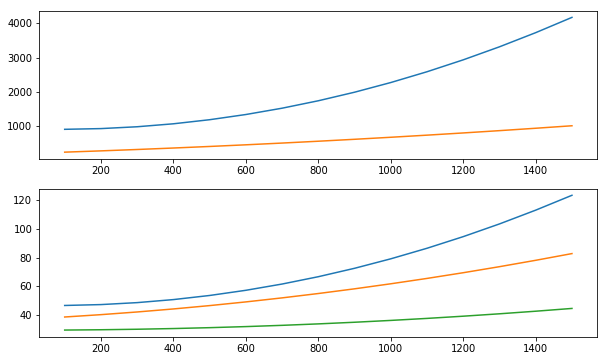

({'p_igbt': array([ 904.16418384,  915.98563127,  953.9582673 , 1018.08209192,
         1108.35710512, 1224.78330692, 1367.36069731, 1536.08927628,
         1730.96904385, 1952.        , 2199.18214474, 2472.51547808,
         2772.        , 3097.63571051]),
  'p_diode': array([ 254.49096672,  308.43708399,  367.68858954,  432.24548336,
          502.10776545,  577.27543582,  657.74849445,  743.52694136,
          834.61077655,  931.        , 1032.69461173, 1139.69461173,
         1252.        , 1369.61077655])},
 {'T_igbt': array([334.63864148, 335.1093044 , 336.19378163, 337.89207318,
         340.20417904, 343.13009922, 346.66983372, 350.82338253,
         355.59074566, 360.9719231 , 366.96691486, 373.57572093,
         380.79834132, 388.63477602]),
  'T_diode': array([327.1514251 , 329.44538791, 332.05860603, 334.99107946,
         338.2428082 , 341.81379226, 345.70403162, 349.91352629,
         354.44227628, 359.29028158, 364.45754219, 369.94405811,
         375.74982934, 381.87485

In [26]:
fig, (ax0,ax1) = plt.subplots(nrows=2)   # creates a figure with one axe
fig.set_size_inches(10,6)
ax0.plot(I, sim_e['p_igbt']) 
ax0.plot(I, sim_e['p_diode']) 

ax1.plot(I, sim_th['T_igbt_deg']) 
ax1.plot(I, sim_th['T_diode_deg'])
ax1.plot(I, sim_th['T_sink_deg'])
plt.show()
sim

## Fuji

In [65]:
df_fp000 = pd.read_csv('./data/fuji_fp0.csv',skiprows=35)
df_fp080 = pd.read_csv('./data/fuji_fp08.csv',skiprows=35)
df_fp100 = pd.read_csv('./data/fuji_fp1.csv',skiprows=35)
    
man_electric = {
        'i_1':df_fp100.iloc[5][0] ,'m_1':0.8,'cosphi_1':1.0,'p_igbt_1':df_fp100.iloc[5][1] ,'p_diode_1':df_fp100.iloc[5][2],
        'i_2':df_fp100.iloc[15][0],'m_2':0.8,'cosphi_2':1.0,'p_igbt_2':df_fp100.iloc[15][1],'p_diode_2':df_fp100.iloc[15][2],
        'i_3':df_fp100.iloc[30][0],'m_3':0.8,'cosphi_3':1.0,'p_igbt_3':df_fp100.iloc[30][1],'p_diode_3':df_fp100.iloc[30][2],
        'i_4':df_fp000.iloc[15][0],'m_4':0.8,'cosphi_4':0.0,'p_igbt_4':df_fp000.iloc[15][1],'p_diode_4':df_fp000.iloc[15][2],
        'i_5':df_fp000.iloc[30][0],'m_5':0.8,'cosphi_5':0.0,'p_igbt_5':df_fp000.iloc[30][1],'p_diode_5':df_fp000.iloc[30][2],
        }    

man_thermal = {
        'p_igbt':df_fp100.iloc[25][1] ,'p_diode':df_fp100.iloc[25][2] , 'T_igbt':df_fp100.iloc[25][3]+k2deg , 'T_diode':df_fp100.iloc[25][5]+k2deg , 'T_sink':df_fp100.iloc[25][9]+k2deg, 'T_a':40.0+k2deg}


params = pyvsc.man2param(man_electric,man_thermal)



[[ 1.00000000e+00  7.25810897e+01 -5.80648718e+01  5.26801459e+03
  -4.21441167e+03]
 [ 1.00000000e+00  2.17743269e+02 -1.74194615e+02  4.74121313e+04
  -3.79297050e+04]
 [ 1.00000000e+00  4.35486538e+02 -3.48389231e+02  1.89648525e+05
  -1.51718820e+05]
 [ 1.00000000e+00  2.17743269e+02 -0.00000000e+00  4.74121313e+04
  -0.00000000e+00]
 [ 1.00000000e+00  4.35486538e+02 -0.00000000e+00  1.89648525e+05
  -0.00000000e+00]]


## Validation

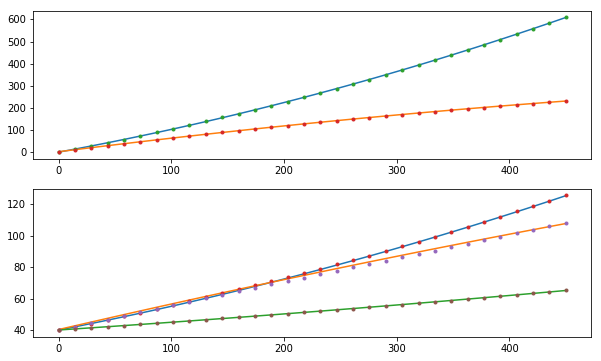

In [72]:
I = np.arange(0,460,10)
sim_e,sim_th = pyvsc.vscthmodel(I, 0.8, 0.8, 40.0+273.15, params)

fig, (ax0,ax1) = plt.subplots(nrows=2)   # creates a figure with one axe
fig.set_size_inches(10,6)

ax0.plot(I, sim_e['p_igbt']) 
ax0.plot(I, sim_e['p_diode']) 
ax0.plot(df_fp080[' Output Current[Arms]'], df_fp080[' T1'],'.') 
ax0.plot(df_fp080[' Output Current[Arms]'], df_fp080[' D1'],'.') 

ax1.plot(I, sim_th['T_igbt_deg']) 
ax1.plot(I, sim_th['T_diode_deg'])
ax1.plot(I, sim_th['T_sink_deg'])

ax1.plot(df_fp080[' Output Current[Arms]'], df_fp080[' Tj-Max(T1)'],'.') 
ax1.plot(df_fp080[' Output Current[Arms]'], df_fp080[' Tj-Max(D1)'],'.') 
ax1.plot(df_fp080[' Output Current[Arms]'], df_fp080[' Tf-Max'],'.') 

plt.show()


In [69]:
df_fp100.columns

Index([' Output Current[Arms]', ' T1', ' D1', ' Tj-Max(T1)', ' Tj-Ave(T1)',
       ' Tj-Max(D1)', ' Tj-Ave(D1)', ' Tc1-Max', ' Tc1-Ave', ' Tf-Max',
       ' Tf-Ave'],
      dtype='object')

In [ ]:
i_rms_fp000 = np.array(i_rms_list)
p_igbt_fp000 = np.array(p_igbt_list)
p_diode_fp000 = np.array(p_diode_list)
T_igbt_fp000 = np.array(T_igbt_list)
T_diode_fp000 = np.array(T_diode_list)
T_sink_fp000 = np.array(T_sink_list)    
pf_fp000 = np.array(fp_list)   
v_out_fp000 = np.array(v_out_list)  
print('i_rms_list ',i_rms_list)
print('p_igbt_list ',p_igbt_list)
print('p_diode_list ',p_diode_list)
print('T_igbt_list ', T_igbt_list)
print('T_diode_list ',T_diode_list)
print('T_s_igbt_list ',T_sink_list)
print('fp_list ',fp_list)

fig, (ax0,ax1) = plt.subplots(nrows=2)   # creates a figure with one axe
fig.set_size_inches(10,6)
ax0.plot(i_rms_fp000, p_igbt_fp000,'.') 
ax0.plot(i_rms_fp000, p_diode_fp000,'.')

ax1.plot(i_rms_fp000, T_igbt_fp000,'.') 
ax1.plot(i_rms_fp000, T_diode_fp000,'.') 
ax1.plot(i_rms_fp000, T_sink_fp000,'.') 
plt.show()

In [6]:
k2deg = 273.16

low_idx_fp100 = 1
mid_idx_fp100 = 3
high_idx_fp100 = -1

low_idx_fp000 = 0
high_idx_fp000 = 1

#i_1 = I_rms_abb_fp_100[low_idx]
#i_2 = I_rms_abb_fp_100[mid_idx]
#i_3 = I_rms_abb_fp_100[high_idx]
#i_4 = I_rms_abb_fp_000[7]
#i_5 = I_rms_abb_fp_000[14]
#
#
#p_igbt_1 = PtotIGBT_abb_fp_100[low_idx]
#p_igbt_2 = PtotIGBT_abb_fp_100[mid_idx]
#p_igbt_3 = PtotIGBT_abb_fp_100[high_idx]
#p_igbt_4 = PtotIGBT_abb_fp_000[7]
#p_igbt_5 = PtotIGBT_abb_fp_000[14]
#
#p_diode_1 = P_diode_abb_fp_100[low_idx]
#p_diode_2 = P_diode_abb_fp_100[mid_idx]
#p_diode_3 = P_diode_abb_fp_100[high_idx]
#p_diode_4 = P_diode_abb_fp_000[7]
#p_diode_5 = P_diode_abb_fp_000[14]
#
#m_1 = 0.95
#m_2 = 0.95
#
#cosphi_1 = 1.0
#cosphi_2 = 0.0


#     Iout += sh.col_values(17,7+(it-1)*13,8+(it-1)*13)
#     VDC += sh.col_values(18,7+(it-1)*13,8+(it-1)*13)
#     fsw  += sh.col_values(20,7+(it-1)*13,8+(it-1)*13)
#     m  += sh.col_values(21,7+(it-1)*13,8+(it-1)*13)     
#     cos_phi +=     sh.col_values(22,7+(it-1)*13,8+(it-1)*13) 
#     PtotRCCDiode += sh.col_values(10,7+(it-1)*13,8+(it-1)*13)
#     PtotRCCIGBT  += sh.col_values(9,7+(it-1)*13,8+(it-1)*13)



i_1 = i_rms_fp100[low_idx_fp100]
i_2 = i_rms_fp100[mid_idx_fp100]
i_3 = i_rms_fp100[high_idx_fp100]
i_4 = i_rms_fp000[low_idx_fp000]
i_5 = i_rms_fp000[high_idx_fp000]


p_igbt_1 = p_igbt_fp100[low_idx_fp100]
p_igbt_2 = p_igbt_fp100[mid_idx_fp100]
p_igbt_3 = p_igbt_fp100[high_idx_fp100]
p_igbt_4 = p_igbt_fp000[low_idx_fp000]
p_igbt_5 = p_igbt_fp000[high_idx_fp000]

p_diode_1 = p_diode_fp100[low_idx_fp100]
p_diode_2 = p_diode_fp100[mid_idx_fp100]
p_diode_3 = p_diode_fp100[high_idx_fp100]
p_diode_4 = p_diode_fp000[low_idx_fp000]
p_diode_5 = p_diode_fp000[high_idx_fp000]

m_1 = np.sqrt(3)*v_out_fp100[low_idx_fp100]/800
m_2 = np.sqrt(3)*v_out_fp100[mid_idx_fp100]/800
m_3 = np.sqrt(3)*v_out_fp100[high_idx_fp100]/800
m_4 = np.sqrt(3)*v_out_fp000[low_idx_fp000]/800
m_5 = np.sqrt(3)*v_out_fp000[high_idx_fp000]/800

cosphi_1 = pf_fp100[low_idx_fp100]
cosphi_2 = pf_fp100[mid_idx_fp100]
cosphi_3 = pf_fp100[high_idx_fp100]
cosphi_4 = pf_fp000[low_idx_fp000]
cosphi_5 = pf_fp000[high_idx_fp000]
   


man_result = [
       [i_1,m_1,cosphi_1,p_igbt_1,p_diode_1],
       [i_2,m_2,cosphi_2,p_igbt_2,p_diode_2],
       [i_3,m_3,cosphi_3,p_igbt_3,p_diode_3],
       [i_4,m_4,cosphi_4,p_igbt_4,p_diode_4],
       [i_5,m_5,cosphi_5,p_igbt_5,p_diode_5]
       ]
   

man_thermal = [
              [p_igbt_fp000[high_idx_fp000],
               p_diode_fp000[high_idx_fp000],
               T_diode_fp000[high_idx_fp000]+k2deg,
               T_diode_fp000[high_idx_fp000]+k2deg,
               T_sink_fp000[high_idx_fp000]+k2deg,
               T_a],
              ]

abc_params = man2param(man_result, man_thermal)


R_th_igbt_sink = (T_igbt_fp100[high_idx_fp100]-T_sink_fp100[high_idx_fp100])/p_igbt_fp100[high_idx_fp100]
R_th_diode_sink = (T_diode_fp100[high_idx_fp100]-T_sink_fp100[high_idx_fp100])/p_diode_fp100[high_idx_fp100]
p_total = (p_igbt_fp100[high_idx_fp100]+p_diode_fp100[high_idx_fp100])
R_th_sink_a = (T_sink_fp100[high_idx_fp100]-(T_a-k2deg))/(p_total)

R_th_igbt_sink = (T_igbt_fp100[high_idx_fp100]-T_sink_fp100[high_idx_fp100])/p_igbt_fp100[high_idx_fp100]
R_th_diode_sink = (T_diode_fp000[high_idx_fp000]-T_sink_fp000[high_idx_fp000])/p_diode_fp000[high_idx_fp000]
p_total = (p_igbt_fp100[high_idx_fp100]+p_diode_fp100[high_idx_fp100])
R_th_sink_a = (T_sink_fp100[high_idx_fp100]-(T_a-k2deg))/(p_total)

#R_th_igbt_sink = 0.2+0.038
#R_th_diode_sink = 0.32 
#R_th_sink_a = 0.031*6

therm_params = dict(R_th_igbt_sink = R_th_igbt_sink,
                    R_th_diode_sink = R_th_diode_sink,
                    R_th_sink_a = R_th_sink_a,
                   )

c_therm_params = dict(C_th_igbt  = 18,
                      C_th_diode = 10,
                      C_th_igbt_case = 5,
                      C_th_diode_case = 2,
                      C_th_sink = 6000.0)

abc_params.update(c_therm_params)
abc_params.update(therm_params)

params = abc_params

print('R_th_igbt_sink',R_th_igbt_sink)
print('R_th_diode_sink',R_th_diode_sink)
print('R_th_sink_a',R_th_sink_a)




[[  1.00000000e+00   5.80000000e+01  -5.02294734e+01   3.36400000e+03
   -2.91330946e+03]
 [  1.00000000e+00   1.15000000e+02  -9.95929214e+01   1.32250000e+04
   -1.14531860e+04]
 [  1.00000000e+00   1.44000000e+02  -1.24707658e+02   2.07360000e+04
   -1.79579028e+04]
 [  1.00000000e+00   7.20000000e+01  -1.24707658e+01   5.18400000e+03
   -8.97895139e+02]
 [  1.00000000e+00   1.44000000e+02  -2.49415316e+01   2.07360000e+04
   -3.59158055e+03]]
R_th_igbt_sink 0.287937743191
R_th_diode_sink 0.563829787234
R_th_sink_a 0.186918032787


In [7]:
T_igbt_fp100[high_idx_fp100]

171.0

In [8]:
p_diode_fp000

array([ 36.,  94.])

In [9]:
man_result

[[58.0, 0.8660254037844386, 1.0, 63.0, 14.0],
 [115.0, 0.8660254037844386, 1.0, 172.0, 34.0],
 [144.0, 0.8660254037844386, 1.0, 257.0, 48.0],
 [72.0, 0.8660254037844386, 0.20000000000000001, 70.0, 36.0],
 [144.0, 0.8660254037844386, 0.20000000000000001, 205.0, 94.0]]

In [10]:
pows, temps = vscthmodel(137, (420*1.73)/800, 0.05, 40+k2deg, params)
print(pows)
print(temps)

{'p_diode': array([ 95.12759929]), 'p_igbt': array([ 178.98819933])}
{'T_igbt_deg': array([ 142.78464401]), 'T_sink': array([ 364.39718584]), 'T_igbt': array([ 415.93464401]), 'T_diode_deg': array([ 144.88295991]), 'T_diode': array([ 418.03295991]), 'T_sink_deg': array([ 91.24718584])}


In [17]:
fobj = open('../letter/src/table_validation_semisel.tex', 'w')

table_validation = ''
results = []



for it in range(5,10):
    sh_output = wb.sheet_by_index(it)
    col_1 = sh_output.col_values(1,0)
    i_rms = float(col_1[2].split(' ')[0]) 
    p_igbt = float(col_1[15].split(' ')[0])
    p_diode = float(col_1[18].split(' ')[0])
    t_igbt = float(col_1[23].split(' ')[0])
    t_diode = float(col_1[24].split(' ')[0])
    t_sink = float(col_1[21].split(' ')[0])
    fp = float(col_1[5])
    v_out = float(col_1[1].split(' ')[0])


    
    m = np.sqrt(3.0)*v_out/800
    
    pows, temps = vscthmodel(i_rms, m, fp, T_a, params)
    
    result1 = [ i_rms, m, fp, p_igbt, p_diode, t_igbt, t_diode , pows['p_igbt'],  pows['p_diode'], temps['T_diode']-273.16, temps['T_diode']-273.16]
    
    result1 = [    '','', '' , 'Manufacturer',   p_igbt,  p_diode, t_igbt, t_diode]
    result2 = [ i_rms, m, fp , 'Model',          float(pows['p_igbt']),  float(pows['p_diode']), float(temps['T_diode']-273.16), float(temps['T_diode']-273.16)]
    result3 = [   '', '', '' , 'Error  ',       100*(p_igbt-pows['p_igbt'])/p_igbt, p_diode, t_igbt, t_diode , pows['p_igbt'],  pows['p_diode'], temps['T_diode']-273.16, temps['T_diode']-273.16]
    results += [[result1],[result2],[result3]]
    
    p_igbt_m =  float(pows['p_igbt'])
    p_diode_m = float(pows['p_diode'])
    t_igbt_m = float(temps['T_igbt']-273.16)
    t_diode_m =  float(temps['T_diode']-273.16)

    
    t_sink_m =  float(temps['T_sink']-273.16) 
    
    if it > 0:
        row_1 = '      &      &      & Man.      & {:2.0f} & {:2.0f} & {:2.0f} & {:2.0f}  &  {:2.0f} \\\\'.format( p_igbt, p_diode, t_igbt, t_diode, t_sink)
        row_2 = ' {:2.0f} & {:2.2f} & {:2.2f} & Model     & {:2.0f} & {:2.0f} & {:2.0f} &  {:2.0f} &  {:2.0f} \\\\'.format( i_rms, m, fp, p_igbt_m, p_diode_m, t_igbt_m, t_diode_m, t_sink_m)
        row_3 = '      &      &      & Error \\%  & {:2.2f} & {:2.2f} & {:2.2f} & {:2.2f}& {:2.2f} \\\\'.format(100.*(p_igbt-p_igbt_m)/p_igbt, 
                                                                                                        100.0*(p_diode-p_diode_m)/p_diode,  
                                                                                                        100.0*(t_igbt-t_igbt_m)/t_igbt, 
                                                                                                        100.*(t_diode- t_diode_m)/t_diode,
                                                                                                        100.*(t_sink- t_sink_m)/t_sink)
        table_validation += row_1 + '\n'
        table_validation += row_2 + '\n'
        table_validation += row_3 + '\n'
        table_validation += r'\midrule' + '\n'
    it += 1
#print(tabulate(results,tablefmt='latex'))

fobj.write(table_validation)
fobj.close()

print(table_validation)

      &      &      & Man.      & 70 & 36 & 82 & 79  &  60 \\
 72 & 0.87 & 0.20 & Model     & 70 & 36 & 80 &  80 &  60 \\
      &      &      & Error \%  & 0.00 & 0.00 & 2.49 & -1.39& 0.33 \\
\midrule
      &      &      & Man.      & 205 & 94 & 159 & 149  &  96 \\
 144 & 0.87 & 0.20 & Model     & 205 & 94 & 155 &  149 &  96 \\
      &      &      & Error \%  & 0.00 & 0.00 & 2.58 & 0.08& 0.13 \\
\midrule
      &      &      & Man.      & 231 & 47 & 159 & 128  &  92 \\
 137 & 0.87 & 0.95 & Model     & 232 & 47 & 159 &  119 &  92 \\
      &      &      & Error \%  & -0.31 & -0.13 & 0.11 & 7.32& -0.11 \\
\midrule
      &      &      & Man.      & 107 & 28 & 97 & 84  &  65 \\
 87 & 0.76 & 0.95 & Model     & 105 & 28 & 95 &  80 &  65 \\
      &      &      & Error \%  & 1.96 & 0.76 & 2.06 & 4.22& 0.32 \\
\midrule
      &      &      & Man.      & 191 & 97 & 154 & 146  &  94 \\
 141 & 0.89 & 0.10 & Model     & 191 & 97 & 149 &  148 &  94 \\
      &      &      & Error \%  & -0.20 & 0.51 & 3.